In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import pyplot as plt

In [3]:
dt=pd.read_csv('doosan bears.csv')

In [4]:
#dt.head()
#dt.shape

In [5]:
#날짜와 상대팀은 고려대상이 아니기 때문에 'day'와 'opponent' 열을 제외하고 데이터프레임 생성
doo=pd.DataFrame(data=dt,columns=['month','attend','day_of_week','temp','skies','day_night','cap','shirt','fireworks','park'])
doo.head()

,month,attend,day_of_week,temp,skies,day_night,cap,shirt,fireworks,park
0,APR,56000,Tuesday,67,Clear,Day,NO,NO,NO,NO
1,APR,29729,Wednesday,58,Cloudy,Night,NO,NO,NO,NO
2,APR,28328,Thursday,57,Cloudy,Night,NO,NO,NO,NO
3,APR,31601,Friday,54,Cloudy,Night,NO,NO,YES,NO
4,APR,46549,Saturday,57,Cloudy,Night,NO,NO,NO,NO


In [6]:
#독립변수(날씨,온도,프로모션 등)와 종속변수(관중 수)의 관계 알아보기 이때 통제변수는 'month' , 'day_of_week', 'park_YES'
rstlm=smf.ols('attend ~ month + day_of_week + temp + skies + day_night + cap + shirt + fireworks + park',data=doo).fit()
rstlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     4.824
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           1.62e-06
Time:                        19:55:56   Log-Likelihood:                -809.89
No. Observations:                  81   AIC:                             1658.
Df Residuals:                      62   BIC:                             1703.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.128e+04   1.14e+04      2.734      0.008    8413.461    5.42e+04
month[T.AUG]              1732.4271   3505.718      0.494      0.623   -5275.403    8740.257
month[T.JUL]              3158.0128   3136.903      1.007      0.318   -3112.567    9428.593
month[T.JUN]              5844.5400   3058.636      1.911      0.061    -269.587     1.2e+04
month[T.MAY]             -2873.9771   2653.213     -1.083      0.283   -8177.674    2429.720
month[T.OCT]             -1466.8018   5683.502     -0.258      0.797   -1.28e+04    9894.357
month[T.SEP]             -1540.6983   4603.916     -0.335      0.739   -1.07e+04    7662.398
day_of_week[T.Monday]     -396.8096   2615.282     -0.152      0.880   -5624.684    4831.064
day_of_week[T.Saturday]   7062.9253   2363.530      2.988      0.004    2338.296    1.18e+04
day_of_week[T.Sunday]     6310.0451   2923.161      2.159      0.035     466.730    1.22e+04
day_of_week[T.Thursday]   1472.6837   3013.590      0.489      0.627   -4551.396    7496.764
day_of_week[T.Tuesday]    8399.6912   2418.101      3.474      0.001    3565.976    1.32e+04
day_of_week[T.Wednesday]  2984.2084   2550.325      1.170      0.246   -2113.819    8082.235
skies[T.Cloudy]          -1746.0631   2011.937     -0.868      0.389   -5767.868    2275.741
day_night[T.Night]        -169.4715   3003.256     -0.056      0.955   -6172.895    5833.952
cap[T.YES]               -5571.9439   4810.931     -1.158      0.251   -1.52e+04    4044.969
shirt[T.YES]              5782.3774   3893.811      1.485      0.143   -2001.239    1.36e+04
fireworks[T.YES]          5452.0106   2303.971      2.366      0.021     846.438    1.01e+04
park[T.YES]               1.024e+04   2700.473      3.792      0.000    4843.337    1.56e+04
temp                        47.5081    186.494      0.255      0.800    -325.289     420.305
==============================================================================
Omnibus:                        9.424   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.256
Skew:                           0.796   Prob(JB):                      0.00977
Kurtosis:                       3.456   Cond. No.                     7.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

아웃라이어 제거 작업

C:\Users\Hwan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


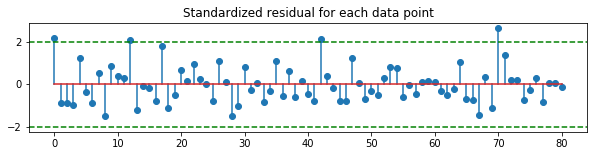

In [7]:
#표준화 잔차 확인 (아웃라이어 확인을 위해)

plt.figure(figsize=(10,2))
plt.stem(rstlm.resid_pearson)
plt.axhline(2,c="g",ls="--")
plt.axhline(-2,c="g",ls="--")
plt.title("Standardized residual for each data point")
plt.show()

C:\Users\Hwan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


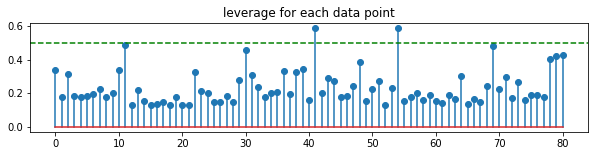

19.000000000000004

In [9]:
#레버리지 확인
influence=rstlm.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10,2))
plt.stem(hat)
plt.axhline(0.5, c="g", ls="--")
plt.title("leverage for each data point")
plt.show()

hat.sum()


In [ ]:
#cooks distance 및 fox 추천 판단
cooks_d2, pvals = influence.cooks_distance
K=influence.k_vars
fox_cr = 4/(len(doo['attend'])-K-1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx


In [15]:
#cooks_distance 및 fox 추천 판단 결과에 의거  0, 41, 42, 54, 69, 70 행 제거

doo1=doo.drop([0,41,42,54,69,70],0)

In [16]:
#아웃라이어 제거 후 다시 회귀분석 진행

rst=smf.ols('attend ~ month + day_of_week + temp + skies + day_night + cap + shirt + fireworks + park',data=doo1).fit()
rst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     8.335
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           5.00e-10
Time:                        20:09:50   Log-Likelihood:                -734.94
No. Observations:                  75   AIC:                             1506.
Df Residuals:                      57   BIC:                             1548.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.166e+04   9826.583      2.204      0.032    1982.504    4.13e+04
month[T.AUG]              2438.7512   3039.321      0.802      0.426   -3647.383    8524.886
month[T.JUL]              3263.3712   2803.336      1.164      0.249   -2350.213    8876.956
month[T.JUN]              6795.5257   2615.328      2.598      0.012    1558.423     1.2e+04
month[T.MAY]             -1517.9311   2289.498     -0.663      0.510   -6102.571    3066.709
month[T.OCT]             -1179.1911   4790.407     -0.246      0.806   -1.08e+04    8413.433
month[T.SEP]             -3255.9311   4221.818     -0.771      0.444   -1.17e+04    5198.113
day_of_week[T.Monday]    -1990.9897   2185.367     -0.911      0.366   -6367.112    2385.133
day_of_week[T.Saturday]   6210.4964   1971.039      3.151      0.003    2263.558    1.02e+04
day_of_week[T.Sunday]     6508.6933   2501.401      2.602      0.012    1499.724    1.15e+04
day_of_week[T.Thursday]    620.3745   2514.981      0.247      0.806   -4415.787    5656.536
day_of_week[T.Tuesday]    6855.6350   2316.955      2.959      0.004    2216.013    1.15e+04
day_of_week[T.Wednesday] -1108.2009   2300.887     -0.482      0.632   -5715.647    3499.245
skies[T.Cloudy]           -510.5413   1746.027     -0.292      0.771   -4006.900    2985.818
day_night[T.Night]        2339.7628   2669.901      0.876      0.385   -3006.621    7686.146
shirt[T.YES]              1.031e+04   3934.469      2.620      0.011    2427.772    1.82e+04
fireworks[T.YES]          4563.8873   1917.618      2.380      0.021     723.923    8403.852
park[T.YES]               9799.9799   2270.521      4.316      0.000    5253.340    1.43e+04
temp                       153.0028    160.112      0.956      0.343    -167.615     473.621
==============================================================================
Omnibus:                        7.287   Durbin-Watson:                   2.477
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.679
Skew:                           0.697   Prob(JB):                       0.0355
Kurtosis:                       3.438   Cond. No.                     9.74e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.28e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
아웃라이어 제거후 회귀분석을 진행하였더니 R과 Adj.R이 현저히 높아진것을 확인할 수 있음.
하지만 이 때 cap(모자 프로모션) 변수가 사라지는것또한 확인 가능함. 
아웃라이어 제거 전 cap변수의 p-value는 0.251 로 유의미하지 못하다고 판단되며,
또한 fox판단 결과 cap변수 자체가 아웃라이어로 판단되었으므로 cap변수는 유의미한 프로모션이 아니라는 전제를 하고 이를 제외한 체
분석을 진행하겠음. 

In [20]:
#shirt(셔츠)
rst2=smf.ols('attend ~ month + day_of_week + temp + skies + day_night + shirt + park',data=doo1).fit()
rst2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     8.335
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           5.00e-10
Time:                        20:13:43   Log-Likelihood:                -734.94
No. Observations:                  75   AIC:                             1506.
Df Residuals:                      57   BIC:                             1548.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.622e+04   1.11e+04      2.357      0.022    3949.198    4.85e+04
month[T.AUG]              2438.7512   3039.321      0.802      0.426   -3647.383    8524.886
month[T.JUL]              3263.3712   2803.336      1.164      0.249   -2350.213    8876.956
month[T.JUN]              6795.5257   2615.328      2.598      0.012    1558.423     1.2e+04
month[T.MAY]             -1517.9311   2289.498     -0.663      0.510   -6102.571    3066.709
month[T.OCT]             -1179.1911   4790.407     -0.246      0.806   -1.08e+04    8413.433
month[T.SEP]             -3255.9311   4221.818     -0.771      0.444   -1.17e+04    5198.113
day_of_week[T.Monday]    -6554.8770   2118.251     -3.094      0.003   -1.08e+04   -2313.152
day_of_week[T.Saturday]   1646.6091   2042.826      0.806      0.424   -2444.080    5737.298
day_of_week[T.Sunday]     1944.8060   3082.802      0.631      0.531   -4228.398    8118.010
day_of_week[T.Thursday]  -3943.5128   2796.768     -1.410      0.164   -9543.945    1656.919
day_of_week[T.Tuesday]    2291.7477   2554.263      0.897      0.373   -2823.076    7406.572
day_of_week[T.Wednesday] -5672.0882   2306.163     -2.460      0.017   -1.03e+04   -1054.077
skies[T.Cloudy]           -510.5413   1746.027     -0.292      0.771   -4006.900    2985.818
day_night[T.Night]        2339.7628   2669.901      0.876      0.385   -3006.621    7686.146
shirt[T.YES]              1.031e+04   3934.469      2.620      0.011    2427.772    1.82e+04
park[T.YES]               9799.9799   2270.521      4.316      0.000    5253.340    1.43e+04
temp                       153.0028    160.112      0.956      0.343    -167.615     473.621
==============================================================================
Omnibus:                        7.287   Durbin-Watson:                   2.477
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.679
Skew:                           0.697   Prob(JB):                       0.0355
Kurtosis:                       3.438   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#fireworks(불꽃놀이)
rst3=smf.ols('attend ~ month + day_of_week + temp + skies + day_night + fireworks + park',data=doo1).fit()
rst3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     7.654
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           3.14e-09
Time:                        20:10:59   Log-Likelihood:                -739.20
No. Observations:                  75   AIC:                             1512.
Df Residuals:                      58   BIC:                             1552.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.074e+04   1.03e+04      2.013      0.049     113.642    4.14e+04
month[T.AUG]               835.7986   3123.903      0.268      0.790   -5417.373    7088.970
month[T.JUL]              1625.6124   2867.499      0.567      0.573   -4114.310    7365.535
month[T.JUN]              6593.3944   2743.114      2.404      0.019    1102.456    1.21e+04
month[T.MAY]             -2933.9557   2334.486     -1.257      0.214   -7606.938    1739.026
month[T.OCT]             -3181.2390   4962.269     -0.641      0.524   -1.31e+04    6751.822
month[T.SEP]             -5286.1662   4354.737     -1.214      0.230    -1.4e+04    3430.787
day_of_week[T.Monday]    -1415.5474   2281.529     -0.620      0.537   -5982.524    3151.429
day_of_week[T.Saturday]   5847.9507   2063.141      2.834      0.006    1718.126    9977.775
day_of_week[T.Sunday]     6773.5833   2622.618      2.583      0.012    1523.843     1.2e+04
day_of_week[T.Thursday]    164.4567   2632.686      0.062      0.950   -5105.436    5434.350
day_of_week[T.Tuesday]    6718.9404   2430.604      2.764      0.008    1853.557    1.16e+04
day_of_week[T.Wednesday] -1548.4640   2407.910     -0.643      0.523   -6368.420    3271.492
skies[T.Cloudy]           -859.6682   1826.791     -0.471      0.640   -4516.388    2797.051
day_night[T.Night]        2336.3173   2801.572      0.834      0.408   -3271.639    7944.274
fireworks[T.YES]          4199.6701   2006.894      2.093      0.041     182.435    8216.905
park[T.YES]               9466.6800   2378.753      3.980      0.000    4705.088    1.42e+04
temp                       189.3575    167.376      1.131      0.263    -145.681     524.396
==============================================================================
Omnibus:                        3.930   Durbin-Watson:                   2.370
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.703
Skew:                           0.542   Prob(JB):                        0.157
Kurtosis:                       2.910   Cond. No.                     9.66e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

3가지 프로모션의 회귀분석 결과


모자 - 앞서 이미 유의미한 프로모션이 아니라는 결과를 확인함

셔츠 - adj.R : 0.628 / p-value : 0.011

불꽃놀이 - adj.R : 0.590 / p-value : 0.041



모자를 제외한 셔츠와 불꽃놀이 프로모션은 모두 유의미한 것으로 판단됨.

따라서 셔츠와 불꽃놀이 프로모션을 진행해도 될것으로 예상되지만,

불꽃놀이의 경우 매주 금요일에 시행되어, 불꽃놀이가 시행되지 않은 금요일에 대한 데이터가 없으므로 이에 대한 데이터를 확보후

단계적으로 시행할 것을 권장함.


In [92]:
#실제로 셔츠 프로모션의 효과를 확인하기 위해 셔츠프로모션이 있었던 날의 관중수와 과 없었던 요일의 평균 관중수의 차이를 확인

doo1

,month,attend,day_of_week,temp,skies,day_night,cap,shirt,fireworks,park
1,APR,29729,Wednesday,58,Cloudy,Night,NO,NO,NO,NO
2,APR,28328,Thursday,57,Cloudy,Night,NO,NO,NO,NO
3,APR,31601,Friday,54,Cloudy,Night,NO,NO,YES,NO
4,APR,46549,Saturday,57,Cloudy,Night,NO,NO,NO,NO
5,APR,38359,Sunday,65,Clear,Day,NO,NO,NO,NO
6,APR,26376,Monday,60,Cloudy,Night,NO,NO,NO,NO
7,APR,44014,Tuesday,63,Cloudy,Night,NO,NO,NO,NO
8,APR,26345,Wednesday,64,Cloudy,Night,NO,NO,NO,NO
9,APR,44807,Friday,66,Clear,Night,NO,NO,YES,NO
10,APR,54242,Saturday,71,Clear,Night,NO,NO,NO,YES


In [93]:
doo.loc[11]

month             APR
attend          48753
day_of_week    Sunday
temp               74
skies          Clear 
day_night         Day
cap                NO
shirt             YES
fireworks          NO
park               NO
Name: 11, dtype: object

In [94]:
doo1.loc[30]

month             JUN
attend          50559
day_of_week    Monday
temp               68
skies          Clear 
day_night       Night
cap                NO
shirt             YES
fireworks          NO
park               NO
Name: 30, dtype: object

In [23]:
#요일별 평균 관중수
doo1['attend'].groupby(doo['day_of_week']).mean()

day_of_week
Friday       40116.923077
Monday       34965.666667
Saturday     43072.923077
Sunday       42250.000000
Thursday     40407.400000
Tuesday      49013.300000
Wednesday    34689.200000
Name: attend, dtype: float64

In [ ]:
확인결과
Monday의 평균관중 : 34965 ----- shirt 프로모션이 있었던 Monday의 관중수 : 50559
Sunday의 평균관중 : 42550 ----- shirt 프로모션이 있었던 Sunday의 관중수 : 48753
        
실제로 효과가 있었던 것으로 확인됨. 하지만 이 역시 데이터의 수가 부족하므로 단계적으로 프로모션을 진행할것을 권장함. 